<a href="https://colab.research.google.com/github/KitkatChunk/AbdulkaremAlani/blob/main/BigDataProject(SVM%2C_FLD_Implementation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of unique classes from the selected dataset: 2


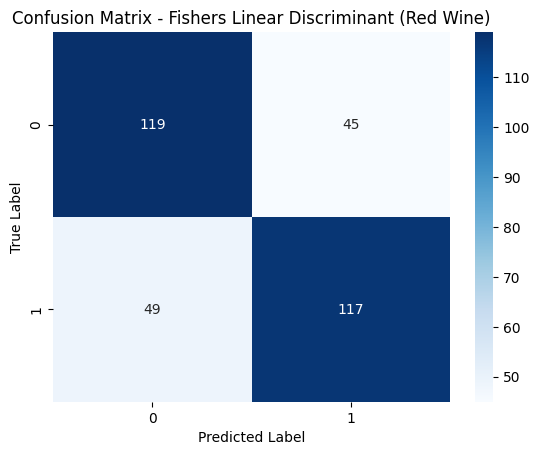

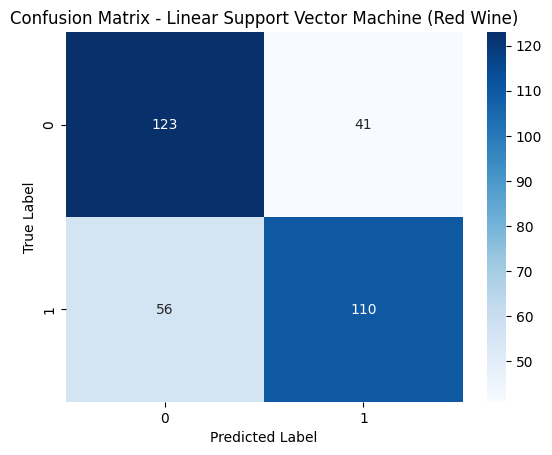

Fishers Linear Discriminant (Red Wine) - Training Time (Average): 0.008638 seconds
Fishers Linear Discriminant (Red Wine) - Testing Time: 0.000270 seconds
Linear Support Vector Machine (Red Wine) - Training Time: 0.744342 seconds
Linear Support Vector Machine (Red Wine) - Testing Time: 0.006708 seconds
Number of unique classes from the selected dataset: 2


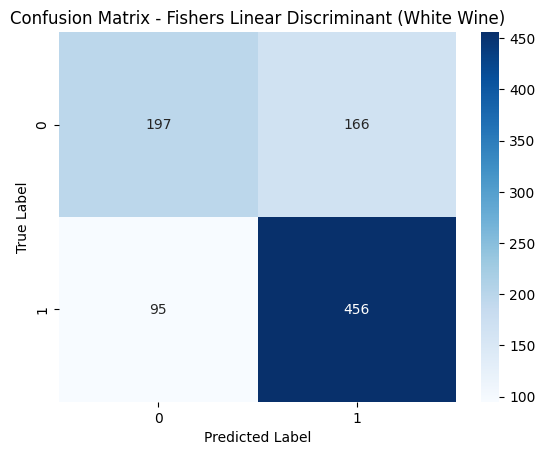

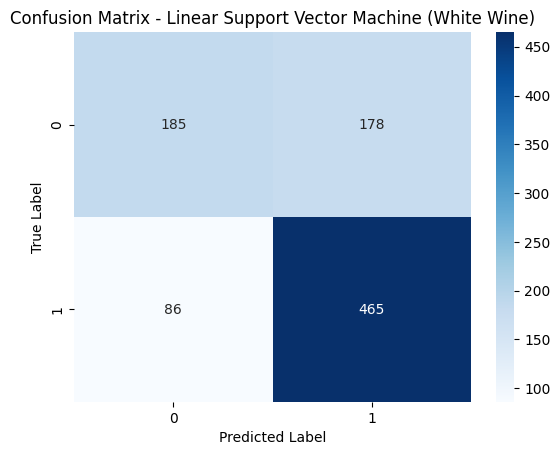

Fishers Linear Discriminant (White Wine) - Training Time (Average): 0.010022 seconds
Fishers Linear Discriminant (White Wine) - Testing Time: 0.004534 seconds
Linear Support Vector Machine (White Wine) - Training Time: 6.890193 seconds
Linear Support Vector Machine (White Wine) - Testing Time: 0.051192 seconds


In [ ]:
# Import necessary libraries
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform classification for a given wine dataset
def perform_classification(X, y, class_1, class_2, title_prefix):
    selected_indices = np.where((y == class_1) | (y == class_2))[0]
    X_selected = X[selected_indices]
    y_selected = y[selected_indices]

    # Print the number of unique classes in the selected dataset
    num_classes_selected = np.unique(y_selected).shape[0]
    print(f"Number of unique classes from the selected dataset: {num_classes_selected}")

    # Manually split the selected dataset into training and testing sets (75% training, 25% testing)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.25, random_state=42)

    # Implement Fishers Linear Discriminant
    fld_training_times = []
    for _ in range(5):
        start_time = time.perf_counter()
        fishers_lda_classifier = LinearDiscriminantAnalysis()
        fishers_lda_classifier.fit(X_train, y_train)
        fld_training_times.append(time.perf_counter() - start_time)

    fld_training_time_avg = np.mean(fld_training_times)

    # Test the Fishers Linear Discriminant
    start_time = time.perf_counter()
    fld_predictions = fishers_lda_classifier.predict(X_test)
    fld_testing_time = time.perf_counter() - start_time

    # Compute and plot confusion matrix for Fishers Linear Discriminant
    conf_matrix_fld = confusion_matrix(y_test, fld_predictions)
    sns.heatmap(conf_matrix_fld, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - Fishers Linear Discriminant ({title_prefix} Wine)')
    plt.show()

    # Implement Linear Support Vector Machine
    start_time = time.perf_counter()
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train, y_train)
    svm_training_time = time.perf_counter() - start_time

    # Test the Linear Support Vector Machine
    start_time = time.perf_counter()
    svm_predictions = svm_classifier.predict(X_test)
    svm_testing_time = time.perf_counter() - start_time

    # Compute and plot confusion matrix for Linear Support Vector Machine
    conf_matrix_svm = confusion_matrix(y_test, svm_predictions)
    sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - Linear Support Vector Machine ({title_prefix} Wine)')
    plt.show()

    # Output computational times
    print(f"Fishers Linear Discriminant ({title_prefix} Wine) - Training Time (Average): {fld_training_time_avg:.6f} seconds")
    print(f"Fishers Linear Discriminant ({title_prefix} Wine) - Testing Time: {fld_testing_time:.6f} seconds")
    print(f"Linear Support Vector Machine ({title_prefix} Wine) - Training Time: {svm_training_time:.6f} seconds")
    print(f"Linear Support Vector Machine ({title_prefix} Wine) - Testing Time: {svm_testing_time:.6f} seconds")

# Load the Red Wine Quality dataset
red_wine_data = pd.read_csv('/content/winequality-red.csv', delimiter=';')
X_red, y_red = red_wine_data.iloc[:, :-1].values, red_wine_data.iloc[:, -1].values

# Perform classification for Red Wine dataset
perform_classification(X_red, y_red, class_1=5, class_2=6, title_prefix='Red')

# Load the White Wine Quality dataset
white_wine_data = pd.read_csv('/content/winequality-white.csv', delimiter=';')
X_white, y_white = white_wine_data.iloc[:, :-1].values, white_wine_data.iloc[:, -1].values

# Perform classification for White Wine dataset
perform_classification(X_white, y_white, class_1=5, class_2=6, title_prefix='White')
